In [639]:
import pandas as pd
import psycopg2 as pg
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt


C:\Users\Hennrick\AppData\Local\Temp\ipykernel_22516\4164335675.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [640]:
host='localhost'
port='5432'
dbname='final_project'
user='postgres'
password='123456'

In [641]:
connection = pg.connect("host='{}' port='{}' dbname='{}' user='{}' password='{}'"
                        .format(host, port, dbname, user, password))

In [642]:
credito = pd.read_sql_query('select * from public."{}"'.format('CREDITO'), con=connection)
clientes = pd.read_sql_query('select * from public."{}"'.format('CLIENTES'), con=connection)
emprego  =pd.read_sql_query('select * from public."{}"'.format('EMPREGO'), con=connection)
estado_civil = pd.read_sql_query('select * from public."{}"'.format('ESTADOCIVIL'), con=connection)
fiador = pd.read_sql_query('select * from public."{}"'.format('FIADOR'), con=connection)
habitacao = pd.read_sql_query('select * from public."{}"'.format('HABITACAO'), con=connection)
historico_credito = pd.read_sql_query('select * from public."{}"'.format('HISTORICO_CREDITO'), con=connection)
investimentos = pd.read_sql_query('select * from public."{}"'.format('INVESTIMENTOS'), con=connection)
outros_financiamentos = pd.read_sql_query('select * from public."{}"'.format('OUTROSFINANC'), con=connection)
profissao = pd.read_sql_query('select * from public."{}"'.format('PROFISSAO'), con=connection)
proposito = pd.read_sql_query('select * from public."{}"'.format('PROPOSITO'), con=connection)


c:\Users\Hennrick\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Hennrick\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Hennrick\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Hennrick\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string

In [643]:
credito

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [644]:
## cada id mostra um range salarial
emprego

,IDEMPREGO,EMPREGO
0,1,<1
1,2,>=7
2,3,1<=X<4
3,4,4<=X<7
4,5,Desempregado


In [645]:
clientes

,idcliente,cliente,estado,sexo
0,1,Adelina Buenaventura,RJ,M
1,2,Adelino Gago,RJ,M
2,3,Adélio Lisboa,SE,M
3,4,Adérito Bahía,MA,M
4,5,Adolfo Patrício,PE,M
...,...,...,...,...
245,246,Jandaíra Albuquerque,SP,F
246,247,Joana Ataí,GO,F
247,248,Joaquim Hurtado,AP,M
248,249,Joaquim Mieiro,TO,M


In [646]:
historico_credito

,IDHISTCRED,HISTORICO
0,1,Critico-outros creditos
1,2,existentes/pagos
2,3,Atrasos anteriores
3,4,sem creditos/todos pagos
4,5,todos pagos


In [647]:
estado_civil

,IDESTADOCIVIL,ESTADOCIVIL
0,1,feminino div/dep/cas
1,2,maculino div/dep
2,3,masculino cas/viu
3,4,masculino solteiro


In [648]:
fiador

,IDFIADOR,FIADOR
0,1,co aplicante
1,2,co requerente
2,3,nao
3,4,sim


In [649]:
habitacao

,IDHABITACAO,HABITACAO
0,1,proria
1,2,de graca
2,3,alugada


In [650]:
investimentos

,IDINVESTIMENTOS,INVESTIMENTOS
0,1,Desconhecido\n
1,2,<100\n
2,3,500<=X<1000
3,4,>=1000
4,5,100<=X<500


In [651]:
outros_financiamentos

,IDOUTROSFINANC,OUTROSFINANCIAMENTOS
0,1,banco
1,2,loja
2,3,nenhum


In [652]:
profissao

,IDPROFISSAO,PROFISSAO
0,1,altamente qualificado/empresario
1,2,desempregado
2,3,nao qualificado
3,4,qualificado


In [653]:
proposito

,IDPROPOSITO,PROPOSITO
0,1,reforma
1,2,educacao
2,3,moveis
3,4,veiculo novo
4,5,veiculo usado
5,6,abrir negocio
6,7,quitar divida
7,8,reforma casa
8,9,outros
9,10,qualificacao


In [654]:
## emprego ja teve os dados faltandtes substituidos, nota-se que ResidenciaDesde e Habitacao tem dados faltantes ainda
credito.count()

IDCREDITO               1000
Duracao                 1000
HistoricoCredito        1000
Proposito               1000
Valor                   1000
Investimentos           1000
Emprego                  990
TempoParcelamento       1000
EstadoCivil             1000
FiadorTerceiros         1000
ResidenciaDesde          993
Idade                   1000
OutrosFinanciamentos    1000
Habitacao                991
EmprestimoExistente     1000
Profissao               1000
Dependentes             1000
SocioEmpresa            1000
Estrangeiro             1000
Status                  1000
dtype: int64

In [655]:
credito.groupby(credito['HistoricoCredito']).size()

HistoricoCredito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

In [656]:
##historico de credito nao tem id 0 em sua tabela como temos apenas 5 tipos iremos substituir pela moda
credito['HistoricoCredito'].count()

1000

In [657]:
credito.loc[credito['HistoricoCredito'] == 0, 'HistoricoCredito'] == 2

64     False
66     False
200    False
270    False
406    False
682    False
819    False
888    False
997    False
998    False
999    False
Name: HistoricoCredito, dtype: bool

In [658]:
credito.groupby(credito['Emprego']).size()

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [659]:
credito.groupby(credito['Emprego']).size().sum()

990

In [660]:
##verificando se os elementos batem com os IDs da tabela
credito.groupby(credito['Emprego']).size()

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [661]:
credito.groupby(credito['HistoricoCredito']).size()

HistoricoCredito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

In [662]:

credito['Emprego'].isna().sum()


10

In [663]:
##substituindo valores NA pela moda 
credito['Emprego'].fillna(3.0, inplace=True)

In [664]:
credito['Emprego'].isna().sum()

0

In [665]:
## 1000 dados com Ids iguais os da tabela eestado civil
credito.groupby(credito['EstadoCivil']).size()

EstadoCivil
1    310
2     50
3     92
4    548
dtype: int64

In [666]:
##1000 dados contados e IDs batendo com a tebela fiador
credito.groupby(credito['FiadorTerceiros']).size()

FiadorTerceiros
1      1
2     39
3    908
4     52
dtype: int64

In [667]:
##IDs batem com o da tabela habitaçao mas temos 9 dados faltantes
credito.groupby(credito['Habitacao']).size()

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64

In [668]:
##substituindo valores NA pela moda
credito['Habitacao'].fillna(1.0, inplace=True)

In [669]:
##IDs batem com o da tabela investimento
credito.groupby(credito['Investimentos']).size()

Investimentos
1    183
2    603
3     63
4     48
5    103
dtype: int64

In [670]:
##IDs batem com os da tabela outros_financiamentos
credito.groupby(credito['OutrosFinanciamentos']).size()

OutrosFinanciamentos
1    139
2     47
3    814
dtype: int64

In [671]:
##IDs nao batem com os da tabela profissao mas a contagem esta certa
credito.groupby(credito['Profissao']).size()

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

In [672]:
##com a moda é o id 4 entao iremos substituir o valor 999 por 4
credito.loc[credito['Profissao'] == 999, 'Profissao'] = 4

In [673]:
credito.groupby(credito['Profissao']).size()

Profissao
1    147
2     22
3    197
4    634
dtype: int64

In [674]:
credito.groupby(credito['Proposito']).size()

Proposito
1     280
2      50
3     181
4     234
5     103
6      97
7      12
8      22
9      12
10      9
dtype: int64

In [675]:
##tem dados na
credito.groupby(credito['ResidenciaDesde']).size()

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [676]:
## substituindo na pela moda
credito['ResidenciaDesde'].fillna(4.0, inplace=True)

In [677]:
credito.groupby(credito['ResidenciaDesde']).size()


ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    416
dtype: int64

In [678]:
#valorees subistituidos e com contagem correta em todas as colunas
credito.count()

IDCREDITO               1000
Duracao                 1000
HistoricoCredito        1000
Proposito               1000
Valor                   1000
Investimentos           1000
Emprego                 1000
TempoParcelamento       1000
EstadoCivil             1000
FiadorTerceiros         1000
ResidenciaDesde         1000
Idade                   1000
OutrosFinanciamentos    1000
Habitacao               1000
EmprestimoExistente     1000
Profissao               1000
Dependentes             1000
SocioEmpresa            1000
Estrangeiro             1000
Status                  1000
dtype: int64

In [679]:
import matplotlib.pyplot as plt

<AxesSubplot:>

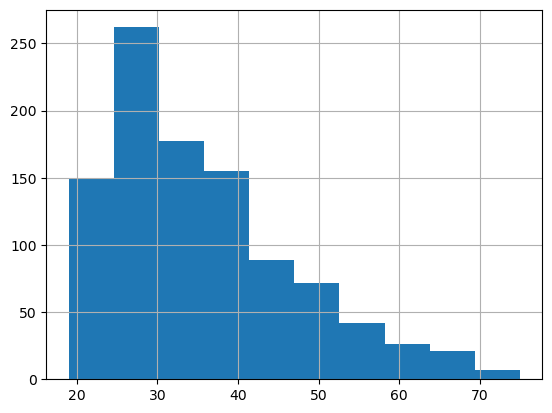

In [680]:
credito['Idade'].hist()

<AxesSubplot:>

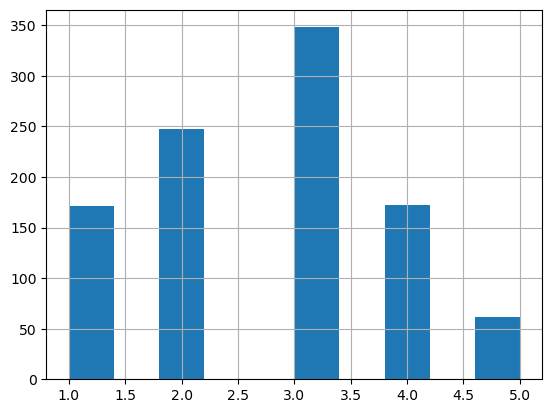

In [681]:
credito['Emprego'].hist()

<AxesSubplot:>

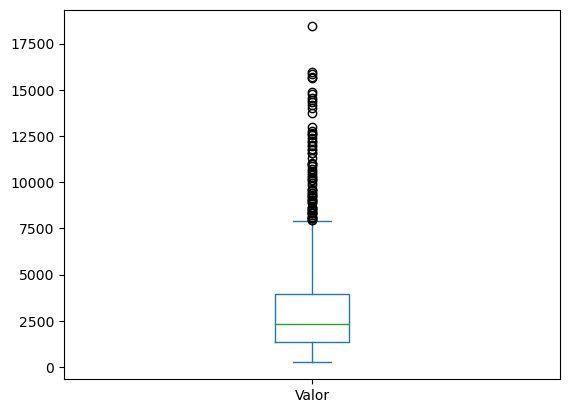

In [682]:
credito['Valor'].plot(kind='box')

In [683]:
credito.groupby(credito['Status']).size()

Status
0    300
1    700
dtype: int64

In [684]:
negativados = credito.loc[credito['Status'] == 0].copy()

In [685]:
negativados.groupby(negativados['Emprego']).size()

Emprego
1.0     70
2.0     63
3.0    105
4.0     39
5.0     23
dtype: int64

In [686]:
negativados.groupby(negativados['Investimentos']).size()

Investimentos
1     32
2    217
3     11
4      6
5     34
dtype: int64

In [687]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [688]:
##retirei estado civil pois os dados dessa coluna nao estao bem definidos.
X = credito.drop(['Status', 'IDCREDITO', 'EstadoCivil'], axis = 1).copy()


In [689]:
y = credito['Status']

In [690]:
#selecionando as variaveis que tem maior correlacao com a classe.
selecao = SelectKBest(score_func=chi2, k=13)
fit = selecao.fit(X, y)
fit.scores_

array([3.21030795e+02, 2.95092546e+01, 3.18693336e+00, 5.82624900e+04,
       1.17224133e-01, 1.59376924e+00, 2.20461935e+00, 2.39265550e-01,
       6.68337510e-03, 3.02003092e+01, 2.24343569e+00, 6.58891395e+00,
       4.95515619e-01, 4.34513046e-01, 1.03071532e-03, 7.92550684e-01,
       6.48777349e+00])

In [691]:
X_new=selecao.fit_transform(X, y)

In [692]:
X_new

array([[48.,  2.,  1., ...,  4.,  0.,  0.],
       [12.,  1.,  2., ...,  3.,  0.,  0.],
       [42.,  2.,  3., ...,  4.,  0.,  0.],
       ...,
       [18.,  0.,  1., ...,  3.,  0.,  0.],
       [ 6.,  0., 10., ...,  1.,  1.,  0.],
       [24.,  0.,  6., ...,  1.,  1.,  0.]])

In [693]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [694]:
#usando regressão logistica
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\Hennrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [695]:
rl_predictions = logmodel.predict(X_test)

In [696]:
print(classification_report(y_test,rl_predictions))

              precision    recall  f1-score   support

           0       0.61      0.24      0.35        91
           1       0.74      0.93      0.82       209

    accuracy                           0.72       300
   macro avg       0.67      0.59      0.59       300
weighted avg       0.70      0.72      0.68       300



In [697]:
confusion_matrix(y_test, rl_predictions)

array([[ 22,  69],
       [ 14, 195]], dtype=int64)

### resultados nao foram satisfatorios.

In [698]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto com randam forest
r_forest = RandomForestClassifier(n_estimators = 100)
r_forest.fit(X_train, y_train)

RandomForestClassifier()

In [699]:
rf_previsoes = r_forest.predict(X_test)
confusao = confusion_matrix(y_test, rf_previsoes)
rf_taxa_acerto = accuracy_score(y_test, rf_previsoes)
confusao

array([[ 23,  68],
       [ 19, 190]], dtype=int64)

### resultados nao foram satisfatorios

In [700]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [701]:
# Previsões utilizando os registros de teste (Naive Bayes)
nb_previsoes = naive_bayes.predict(X_test)
nb_previsoes

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], d

In [702]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_test, nb_previsoes)
confusao

array([[ 45,  46],
       [ 29, 180]], dtype=int64)

In [703]:
taxa_acerto = accuracy_score(y_test, nb_previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.75

### Tivemos baixa taxa de acerto tanto com regressao logistica, naive bays ou random forest. vamos balancear mais os dados usando tecnica de oversampling nos negativados.

In [704]:
from imblearn.over_sampling import RandomOverSampler

In [705]:
#oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
y_res.value_counts()

0    700
1    700
Name: Status, dtype: int64

In [706]:
#selecionando as melhores variaveis para uso, mas acabei ultilizando a tabels X(criada anteriormente) original.
selecao = SelectKBest(score_func=chi2, k=14)
fit = selecao.fit(X_res, y_res)
fit.scores_

array([4.80312508e+02, 6.33816794e+01, 8.84382666e+00, 8.84923971e+04,
       1.38080591e+00, 1.33395078e+00, 4.31565238e+00, 4.20200095e-01,
       1.60240361e-02, 6.19652863e+01, 5.10165806e+00, 1.22790147e+01,
       8.04020101e-03, 9.73119445e-01, 3.93603936e-02, 2.11908932e-01,
       2.06315789e+01])

In [707]:
X_new=selecao.fit_transform(X_res, y_res)

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 6)

In [709]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\Hennrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [710]:
rl_predictions = logmodel.predict(X_test)

In [711]:
print(classification_report(y_test,rl_predictions))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       148
           1       0.64      0.67      0.65       132

    accuracy                           0.66       280
   macro avg       0.66      0.66      0.66       280
weighted avg       0.67      0.66      0.66       280



In [712]:
confusion_matrix(y_test, rl_predictions)

array([[98, 50],
       [44, 88]], dtype=int64)

### usando regressao logistica  nao tivemos bons resultados.

In [713]:
r_forest = RandomForestClassifier(n_estimators = 180)
r_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=180)

In [714]:
rf_previsoes = r_forest.predict(X_test)
confusao = confusion_matrix(y_test, rf_previsoes)
rf_taxa_acerto = accuracy_score(y_test, rf_previsoes)
confusao

array([[138,  10],
       [ 18, 114]], dtype=int64)

In [715]:
rf_taxa_acerto

0.9

In [716]:
rf_pre = r_forest.predict(X)
confusao = confusion_matrix(y, rf_pre)
rf_taxa = accuracy_score(y, rf_pre)
confusao

array([[290,  10],
       [ 18, 682]], dtype=int64)

In [717]:
rf_taxa

0.972

### usando random forest teve um bom resultado em todos os sentidos, taxa de acerto de 90%, com numero baixo de falsos negativos o que nos da uma menor perca de possiveis bons clientes(adiplentes). Quando feito o teste com toda a base de dados encaminhada temos resultados ainda melhores, com precisao acima de 97%.

In [718]:
print(classification_report(y_test,rf_previsoes))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       148
           1       0.92      0.86      0.89       132

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



In [719]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [720]:
nb_previsoes = naive_bayes.predict(X_test)
nb_previsoes

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [721]:
confusao = confusion_matrix(y_test, nb_previsoes)
confusao

array([[103,  45],
       [ 48,  84]], dtype=int64)

In [722]:
taxa_acerto = accuracy_score(y_test, nb_previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.6678571428571428

### o modelo radom forest ultilizado após o oversampling teve otimos resultados e pode ser utilizado para previsao de clientes inadiplentes